<table>
        <td>
        <td><img src="https://educacioncontinua.anahuac.mx/cdn/shop/files/Logo_CentrodeEducacionContinua-01_300x300.png?v=1727301783" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Machine Learning  </p> Clasificación </p> Repaso   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Diplomado </p></tp>
            <tp><p style="font-size:115%;text-align:center"> 2026-1</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>



Con esto podemos hacer predicciones

# <FONT SIZE=5 COLOR="purple"> Ejercicio de Repaso de Clasificación </FONT>



Este archivo tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este trabajo se tomaron y modificaron de *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Se anexan los datos como ***datos_credito*** y este trabajo se va a desarrollar con este conjunto.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/datos_credito.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales* (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

## <FONT SIZE=4 COLOR="blue"> 1. Librerías de trabajo </FONT>

In [30]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# modelos de clasificación
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from imblearn.metrics           import specificity_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV

# para hacer la curva ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# selección de características
from sklearn.feature_selection  import RFE

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 2. Cargar los datos y explorar </FONT>



In [31]:
# cargar los datos que están la dirección del github
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/datos_credito.csv"
credito = pd.read_csv(url, na_values=[" "])

In [32]:
credito.head(6)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
5,1,0,23.25000,2.5000,0.044438,91.996670,0,0,0,54,1,1


In [33]:
# cola de los datos
credito.tail()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1305,1,0,33.58333,4.566,0.002146,7.333333,1,0,0,94,1,19
1306,0,5,23.91667,3.192,0.000376,0.000000,0,0,3,12,1,5
1307,1,0,40.58333,4.600,0.026513,101.298300,1,0,2,1,1,2
1308,1,0,32.83333,3.700,0.008999,26.996670,0,1,0,60,1,7
1309,1,0,48.25000,3.700,0.111619,344.157500,1,0,2,2,1,0


In [34]:
# tamaño de los datos
credito.shape

(1310, 12)

In [35]:
# nombre de las columnas
credito.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [8]:
# información de los datos
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1310 non-null   int64  
 1   reports      1310 non-null   int64  
 2   age          1310 non-null   float64
 3   income       1310 non-null   float64
 4   share        1310 non-null   float64
 5   expenditure  1310 non-null   float64
 6   owner        1310 non-null   int64  
 7   selfemp      1310 non-null   int64  
 8   dependents   1310 non-null   int64  
 9   months       1310 non-null   int64  
 10  majorcards   1310 non-null   int64  
 11  active       1310 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 122.9 KB


In [36]:
# estadísticas de los datos
credito.describe()


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,0.775573,0.458779,33.374873,3.368444,0.068644,184.996730,0.440458,0.069466,0.993130,55.111450,0.817557,6.993130
std,0.417364,1.349327,9.886538,1.698234,0.094828,272.843418,0.496632,0.254341,1.248051,66.229211,0.386356,6.302954
min,0.000000,0.000000,18.166670,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.240625,0.002272,4.583333,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038775,101.231650,0.000000,0.000000,0.500000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093396,248.859150,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


## <FONT SIZE=4 COLOR="blue"> 3. Algunas gráficas </FONT>

In [37]:
# histograma de la edad plotly.express
px.histogram(credito,
             x="age")

In [38]:
# boxplot de la variable edad en plotly express
px.box(credito,
       y="age")


In [39]:
# variable interes a predecir es card. tabla de frecuencias
credito["card"].value_counts()

,count
card,
1,1016
0,294


## <FONT SIZE=4 COLOR="blue"> 4. Modelos de Machine Learning </FONT>

Aplicaremos algunos modelos

### <FONT SIZE=4 COLOR="blue"> 4.1 KNN - Vecinos más cercanos </FONT>

- Se debe seleccionar el número de vecinos (por defecto son 5)

- Se deben escalar los datos

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        88
           1       0.89      0.96      0.92       305

    accuracy                           0.87       393
   macro avg       0.85      0.76      0.79       393
weighted avg       0.87      0.87      0.86       393



,metricas,values
0,accuracy,0.872774
1,recall,0.960656
2,specificidad,0.568182
3,precision,0.885196
4,f1,0.921384


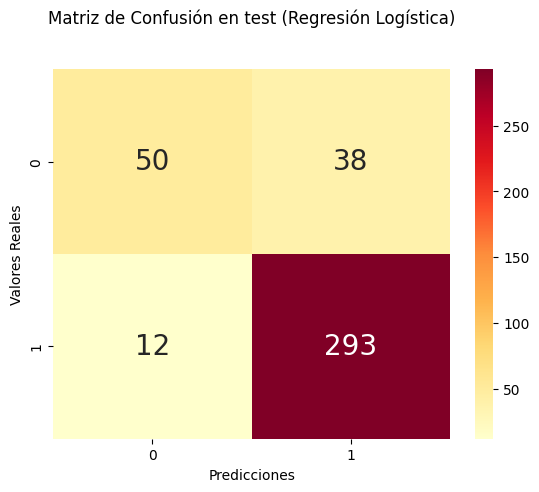

In [40]:
# 1. identificar las variables
y = credito["card"]
X = credito.drop("card", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de knn
modelo_knn = KNeighborsClassifier()

# 5. Entrenar el modelo
modelo_knn.fit(X_train_s,y_train)

# 6. Predicciones y matriz de confusión
y_pred = modelo_knn.predict(X_test_s)
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (Regresión Logística)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_pred))

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values_knn = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metricas": metrics , "values" : values_knn})

### <FONT SIZE=4 COLOR="blue"> 4.2 Regresión logística </FONT>

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        88
           1       0.97      0.97      0.97       305

    accuracy                           0.95       393
   macro avg       0.94      0.93      0.93       393
weighted avg       0.95      0.95      0.95       393



,metricas,values
0,accuracy,0.954198
1,recall,0.973770
2,specificidad,0.886364
3,precision,0.967427
4,f1,0.970588


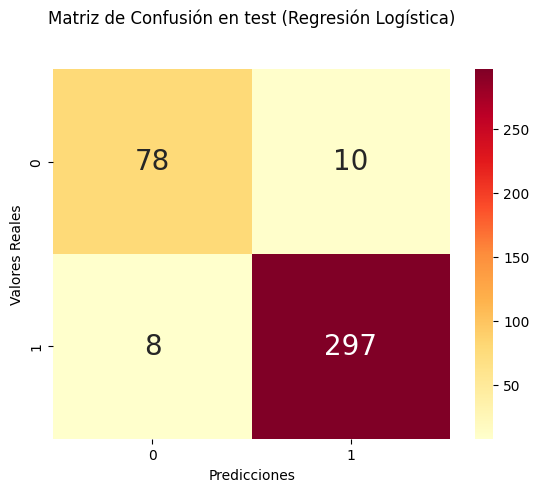

In [41]:
# 1. identificar las variables
y = credito["card"]
X = credito.drop("card", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de knn
modelo_reglog = LogisticRegression()

# 5. Entrenar el modelo
modelo_reglog.fit(X_train_s,y_train)

# 6. Predicciones y matriz de confusión
y_pred = modelo_reglog.predict(X_test_s)


MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (Regresión Logística)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_pred))

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values_log = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metricas": metrics , "values" : values_log})

### <FONT SIZE=4 COLOR="blue"> 4.3 Árboles de Decisión </FONT>

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.99      0.97      0.98       305

    accuracy                           0.96       393
   macro avg       0.94      0.96      0.95       393
weighted avg       0.97      0.96      0.96       393



,metricas,values
0,accuracy,0.964377
1,recall,0.967213
2,specificidad,0.954545
3,precision,0.986622
4,f1,0.976821


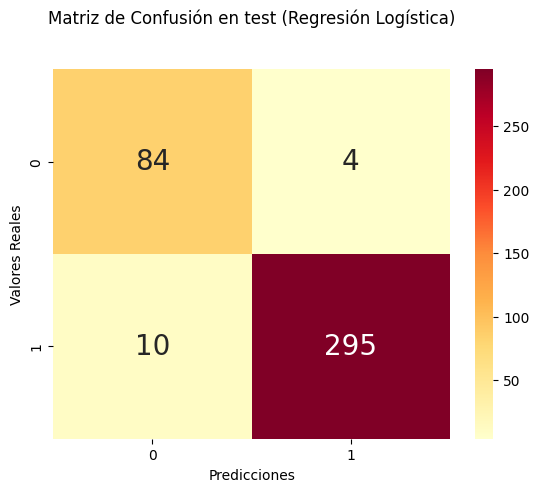

In [42]:
# 1. identificar las variables
y = credito["card"]
X = credito.drop("card", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 4. Definir el modelo de knn
modelo_tree = DecisionTreeClassifier(random_state=123)

# 5. Entrenar el modelo
modelo_tree.fit(X_train,y_train)

# 6. Predicciones y matriz de confusión
y_pred = modelo_tree.predict(X_test)
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (Regresión Logística)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_pred))

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values_tree = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metricas": metrics , "values" : values_tree})

In [43]:
# resumen de las métricas
pd.DataFrame({"metricas": metrics , "values_knn" : values_knn , "values_log" : values_log , "values_tree": values_tree})

,metricas,values_knn,values_log,values_tree
0,accuracy,0.872774,0.954198,0.964377
1,recall,0.960656,0.973770,0.967213
2,specificidad,0.568182,0.886364,0.954545
3,precision,0.885196,0.967427,0.986622
4,f1,0.921384,0.970588,0.976821


### <FONT SIZE=4 COLOR="blue"> 5. Mejor Modelo-Curva ROC </FONT>

Formalmente, la curva ROC es la representación gráfica de la razón o proporción de verdaderos positivos (TPR = True positive rate) frente a la razón o proporción de falsos positivos (FPR = False positive rate) según se varía el umbral de discriminación (valor a partir del cual decidimos que un caso es un positivo).

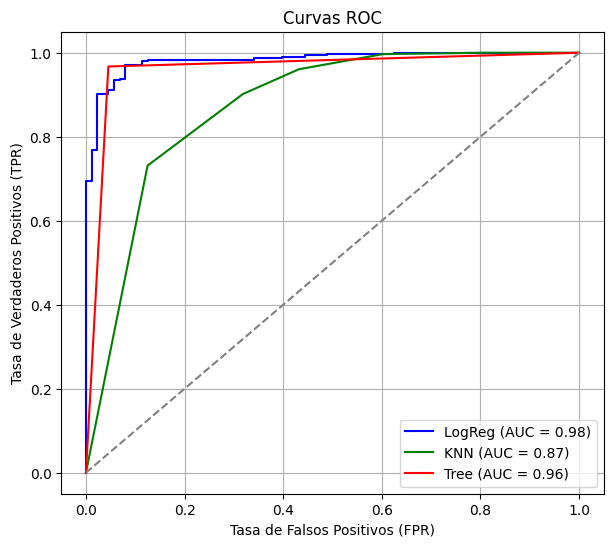

In [44]:
# cálculo de los elementos
# Curva ROC
fpr_test_log, tpr_test_log, _ = roc_curve(y_test, modelo_reglog.predict_proba(X_test_s)[:,1])
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, modelo_knn.predict_proba(X_test_s)[:,1])
fpr_test_tree, tpr_test_tree, _ = roc_curve(y_test, modelo_tree.predict_proba(X_test)[:,1])
# AUC
auc_test_log = roc_auc_score(y_test, modelo_reglog.predict_proba(X_test_s)[:,1])
auc_test_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_s)[:,1])
auc_test_tree = roc_auc_score(y_test, modelo_tree.predict_proba(X_test)[:,1])

# Gráfica curva ROC
plt.figure(figsize=(7,6))
plt.plot(fpr_test_log, tpr_test_log, color='blue', label=f'LogReg (AUC = {auc_test_log:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, color='green', label=f'KNN (AUC = {auc_test_knn:.2f})')
plt.plot(fpr_test_tree, tpr_test_tree, color='red', label=f'Tree (AUC = {auc_test_tree:.2f})')
# Línea diagonal (azar)
plt.plot([0,1], [0,1], color='gray', linestyle='--')

# Detalles del gráfico
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Concluimos que el mejor modelo es el de árboles de decisión con un área bajo la curva (ROC) de 0.96

### <FONT SIZE=4 COLOR="blue"> 6. Validación cruzada </FONT>

In [45]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline        import make_pipeline

#pipeline = make_pipeline(StandardScaler(), modelo_reglog)

#kfold_validacion = KFold(10)                              # divide los datos en 10 pliegues.
resultados = cross_val_score(modelo_tree,                  # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = 10,                      # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

[0.96183206 0.95419847 0.96183206 0.97709924 0.96183206 0.97709924
 0.98473282 0.95419847 0.96183206 0.97709924]


np.float64(0.967175572519084)

### <FONT SIZE=4 COLOR="blue"> 7. Predicciones </FONT>

In [47]:
X_new = [0,	35.66667,	3.5200,	0.023,	120.89,	1,	0,	4,	30,	2,	9]

In [48]:
# usamos la función escalar.transform
X_new = np.array([[0,	35.66667,	3.5200,	0.023,	120.89,	1,	0,	4,	30,	2,	9]])
#X_new_s = escalar.transform(X_new)
#prediccion
modelo_tree.predict(X_new)

array([1])

Se concluye que el modelo indica que se asigna tarjeta de crédito